In [1]:
import pandas as pd
heart_disease=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
import warnings
warnings.filterwarnings("default")

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X=heart_disease.drop("target",axis=1)
Y=heart_disease["target"]

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [7]:
clf.fit(X_train,Y_train);

In [8]:
y_label=clf.predict(np.array([0,2,3,4]))

C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
Y_preds=clf.predict(X_test)
Y_preds

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [10]:
clf.score(X_train,Y_train)

1.0

In [11]:
clf.score(X_test,Y_test)

0.7540983606557377

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69        27
           1       0.74      0.85      0.79        34

    accuracy                           0.75        61
   macro avg       0.76      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



In [13]:
confusion_matrix(Y_test, Y_preds)

array([[17, 10],
       [ 5, 29]], dtype=int64)

In [14]:
accuracy_score(Y_test,Y_preds)

0.7540983606557377

In [15]:
np.random.seed(42)
for i in range(10,100,8):
    print(f"Trying model with {i} estimators")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test)*100} %")

Trying model with 10 estimators
Model accuracy on test set: 72.1311475409836 %
Trying model with 18 estimators
Model accuracy on test set: 78.68852459016394 %
Trying model with 26 estimators
Model accuracy on test set: 73.77049180327869 %
Trying model with 34 estimators
Model accuracy on test set: 78.68852459016394 %
Trying model with 42 estimators
Model accuracy on test set: 80.32786885245902 %
Trying model with 50 estimators
Model accuracy on test set: 78.68852459016394 %
Trying model with 58 estimators
Model accuracy on test set: 77.04918032786885 %
Trying model with 66 estimators
Model accuracy on test set: 77.04918032786885 %
Trying model with 74 estimators
Model accuracy on test set: 77.04918032786885 %
Trying model with 82 estimators
Model accuracy on test set: 80.32786885245902 %
Trying model with 90 estimators
Model accuracy on test set: 78.68852459016394 %
Trying model with 98 estimators
Model accuracy on test set: 81.9672131147541 %


In [16]:
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\3869600605.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf,open("random_forest_model_1.pkl","wb"))


In [17]:
model1=pickle.load(open("random_forest_model_1.pkl","rb"))
model1.score(X_test,Y_test)*100

C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\3618148942.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  model1=pickle.load(open("random_forest_model_1.pkl","rb"))


81.9672131147541

In [18]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.18 (default, Sep 11 2023, 13:47:48) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\rugyr\anaconda3\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: None
       pandas: 1.4.4
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\rugyr\anaconda3\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\Users\rugyr\anaconda3\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x=heart_disease.drop("target",axis=1)

In [21]:
y=heart_disease["target"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
x.shape[0]*0.8

242.4

In [26]:
car_sales=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\car-sales-extended.csv")
car_sales

<>:1: DeprecationWarning: invalid escape sequence \g
<>:1: DeprecationWarning: invalid escape sequence \g
C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\3397624224.py:1: DeprecationWarning: invalid escape sequence \g
  car_sales=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\car-sales-extended.csv")


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.ensemble import  RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_feature)],
                              remainder="passthrough")

transformed_x=transformer.fit_transform(x)


In [31]:
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [33]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [34]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

In [35]:
model.fit(X_train,y_train);

In [36]:
model.score(X_test,y_test)

0.3235867221569877

# Missing Data

1> Fill Missing Data

2> Remove the samples with missing dataset

In [37]:
car_sales_missing=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")
car_sales_missing

<>:1: DeprecationWarning: invalid escape sequence \g
<>:1: DeprecationWarning: invalid escape sequence \g
C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\2139467840.py:1: DeprecationWarning: invalid escape sequence \g
  car_sales_missing=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
Categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               Categorical_features)],
                             remainder="passthrough")
transformed_x=transformer.fit_transform(x)

In [41]:
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

# 1.Filling  the Data!

In [42]:
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [43]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

# Filling data scikit learn

In [44]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [45]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

imputer=ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                           ("door_imputer",door_imputer,door_features),
                           ("num_imputer",num_imputer,num_features)])

filled_x=imputer.fit_transform(x)
filled_x=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
filled_x

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_feature=["Make","Colour","Doors","Odometer (KM)"]

one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                Categorical_feature)],
                              remainder="passthrough")

transformed_x=transformer.fit_transform(filled_x)

transformed_x

<950x915 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [48]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.04749635586656553

In [49]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [50]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
housing_df["target"]=housing["target"]
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5758549611440126

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=Lasso()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.2841671821008396

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=SVR(kernel='rbf')
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.01648536010717372

In [55]:
"""
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=SVR(kernel='linear')
model.fit(x_train,y_train)
model.score(x_test,y_test)"""

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.svm import SVR\n\nnp.random.seed(42)\n\nx=housing_df.drop("target",axis=1)\ny=housing_df["target"]\n\nx_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)\n\nmodel=SVR(kernel=\'linear\')\nmodel.fit(x_train,y_train)\nmodel.score(x_test,y_test)'

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8065734772187598

# Classification

In [57]:
heart_disease=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\heart-disease.csv")
heart_disease

<>:1: DeprecationWarning: invalid escape sequence \g
<>:1: DeprecationWarning: invalid escape sequence \g
C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\3178779971.py:1: DeprecationWarning: invalid escape sequence \g
  heart_disease=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\heart-disease.csv")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
from sklearn.svm import LinearSVC

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=LinearSVC(max_iter=10000)
model.fit(x_train,y_train)
model.score(x_test,y_test)


C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [59]:
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestClassifier(n_estimators=127)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8688524590163934

In [60]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [61]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [62]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [63]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
#compare predictions to truth values.
y_preds=model.predict(x_test)
np.mean(y_preds==y_test)

0.8688524590163934

In [66]:
model.score(x_test,y_test)

0.8688524590163934

In [67]:
model.predict_proba(x_test[:5])

array([[0.88188976, 0.11811024],
       [0.44094488, 0.55905512],
       [0.44094488, 0.55905512],
       [0.8503937 , 0.1496063 ],
       [0.19685039, 0.80314961]])

In [68]:
model.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [69]:
x_test[:5]        

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [70]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8065734772187598

In [71]:
y_preds=model.predict(x_test)

In [72]:
np.array(y_preds)

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [73]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [74]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [75]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=127)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=127)

In [76]:
clf.score(x_test,y_test)

0.8688524590163934

In [77]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
model.score(x_test,y_test)

0.8065734772187598

# Using Scoring Parameter

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=127)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=127)

In [80]:
clf.score(x_test,y_test)

0.8688524590163934

In [81]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.87096774, 0.90322581, 0.93333333, 0.9       ,
       0.86666667, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [82]:
np.random.seed(42)
clf_single_score=clf.score(x_test,y_test)

clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=100))
clf_single_score,clf_cross_val_score

(0.8688524590163934, 0.8150000000000002)

In [83]:
#Defult scoring parameter of classifier=men_accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [84]:
# Scoring parameter
np.random.seed(42)
cross_val_score(clf,x,y,scoring=None)

array([0.83606557, 0.90163934, 0.78688525, 0.8       , 0.75      ])

# Classification model evaluation

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,x,y,cv=5)

In [86]:
np.mean(cross_val_score)

0.8215300546448088

In [87]:
print(f"Heart Diseaase Claaassifier Cross-Vlidated Accuracy : {np.mean(cross_val_score)*100:.2f} %")

Heart Diseaase Claaassifier Cross-Vlidated Accuracy : 82.15 %


# AUC (Area Under Curve) - ROC( Reciever Operating Characteristics) curve

In [88]:
clf.fit(x_train,y_train)

y_probs=clf.predict_proba(x_test)

In [89]:
y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.25, 0.75],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.51, 0.49]])

In [90]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.06, 0.58, 0.49, 0.11, 0.77, 0.84, 0.75, 0.04, 0.02, 0.49])

In [91]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

In [92]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.17241379,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.27586207,
       0.55172414, 0.68965517, 0.72413793, 0.72413793, 0.79310345,
       0.89655172, 0.96551724, 1.        ])

In [93]:
tpr

array([0.     , 0.03125, 0.09375, 0.1875 , 0.3125 , 0.40625, 0.59375,
       0.625  , 0.625  , 0.65625, 0.6875 , 0.71875, 0.71875, 0.75   ,
       0.75   , 0.84375, 0.90625, 0.90625, 0.9375 , 0.96875, 0.96875,
       0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     , 1.     ])

In [94]:
thresholds

array([ inf, 1.  , 0.99, 0.93, 0.85, 0.79, 0.75, 0.71, 0.7 , 0.68, 0.67,
       0.66, 0.64, 0.61, 0.57, 0.53, 0.49, 0.33, 0.26, 0.24, 0.12, 0.11,
       0.1 , 0.08, 0.06, 0.02, 0.01, 0.  ])

In [95]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="blue",linestyle="--",label="Guessing")
    
    plt.title("Reciever Operating Characteristics (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend()
    plt.show()

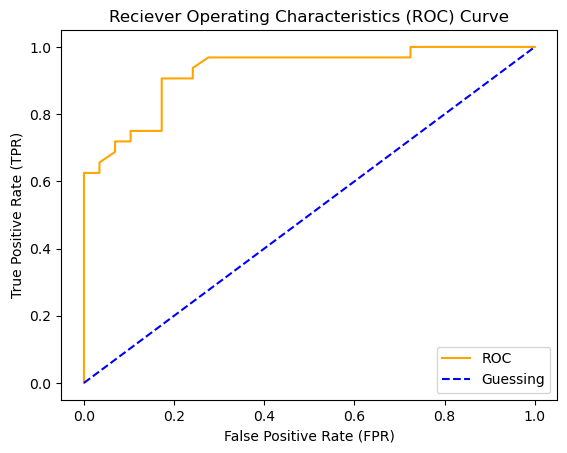

In [96]:
plot_roc_curve(fpr,tpr)

In [97]:
roc_auc_score(y_test,y_probs_positive)

0.9267241379310345

In [98]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [99]:
pd.crosstab(y_test,y_preds,
            rownames=["Actual  Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


In [100]:
import seaborn as sns

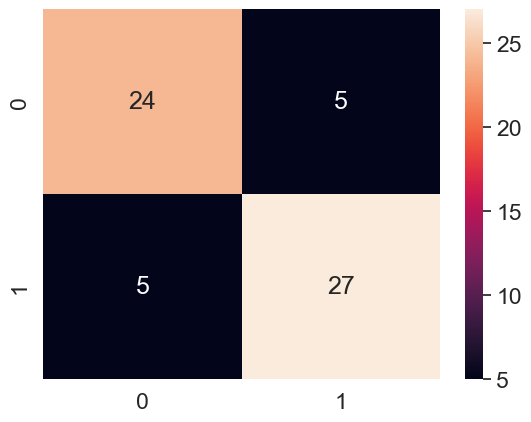

In [101]:
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat,annot=True);

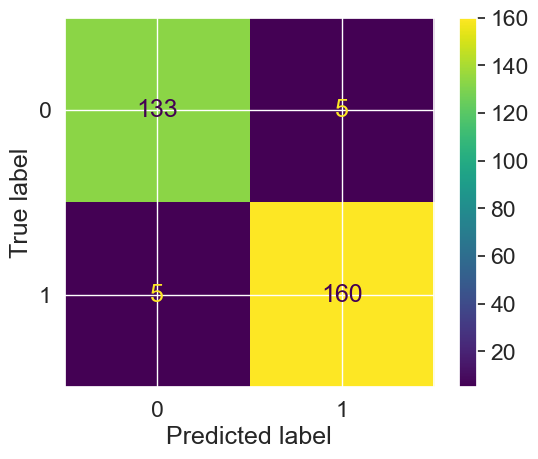

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)

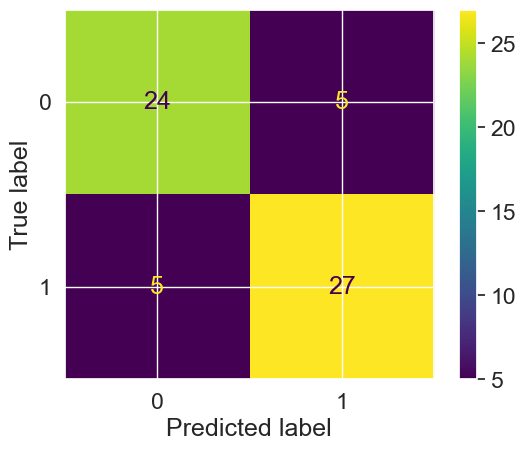

In [103]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

`Classifications report`

In [104]:
from sklearn.metrics import classification_report
classification_report=pd.DataFrame(classification_report(y_test,y_preds,output_dict=True))
classification_report

,0,1,accuracy,macro avg,weighted avg
precision,0.827586,0.84375,0.836066,0.835668,0.836066
recall,0.827586,0.84375,0.836066,0.835668,0.836066
f1-score,0.827586,0.84375,0.836066,0.835668,0.836066
support,29.000000,32.00000,0.836066,61.000000,61.000000


# Regression model evaluation metrics

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean Absolute Error
3. Mean Squared Error.

In [105]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [106]:
model.score(x_test,y_test)

0.8065734772187598

In [107]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [108]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [109]:
y_test.mean()

2.0550030959302275

In [110]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [111]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [112]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [113]:
y_preds=model.predict(x_test)

In [114]:
r2_score(y_true=y_test,y_pred=y_preds)

0.8065734772187598

In [115]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

# Mean Absolute Error

In [116]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_preds)

In [117]:
mae

0.32659871732073664

In [118]:
df=pd.DataFrame({"actual_values":y_test,"predicted_values":y_preds})
df["difference"]=df["predicted_values"]-df["actual_values"]
df

,actual_values,predicted_values,difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [119]:
np.abs(df["difference"]).mean()

0.32659871732073803

In [120]:
df["squared_differences"]=np.square(df["difference"])
df.head()

,actual_values,predicted_values,difference,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [121]:
df["squared_differences"].mean()

0.25346785208245565

In [122]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared_differences"]=16

In [123]:
df_large_error["squared_differences"].mean()

0.2573437523766417

# Using Scoring Parameter

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier(n_estimators=100)

In [125]:
np.random.seed(42)

cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None)
#if scoring = none,estimator's default scoring evaluation metric is used (accuracy for classification model)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [126]:
print(f"the cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

the cross-validated accuracy is : 82.48%


In [127]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [128]:
print(f"the cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

the cross-validated accuracy is : 82.48%


In [129]:
np.random.seed(42)
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [130]:
print(f"the cross-validated precision is : {np.mean(cv_precision)*100:.2f}%")

the cross-validated precision is : 83.30%


In [131]:
np.random.seed(42)
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [132]:
print(f"the cross-validated recall is : {np.mean(cv_recall)*100:.2f}%")

the cross-validated recall is : 85.45%


In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
model=RandomForestRegressor(n_estimators=100)

In [134]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [135]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [144]:
# Mean Absolute error
np.random.seed(42)
cv_mae=cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46620501732073655

In [145]:
cv_mae

array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856])

In [142]:
np.random.seed(42)
cv_mse=cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4301865790173885

In [143]:
cv_mse

array([-0.51906271, -0.34789469, -0.37117373, -0.4500546 , -0.46274716])

# Using Different evaluation matrics as scikit-learn function

In [159]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create x & y
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Create model
clf=RandomForestClassifier()

# Fit model
clf.fit(x_train,y_train)

# evaluate the model using evaluation function
y_preds=clf.predict(x_test)
score_acc=accuracy_score(y_test,y_preds)
score_pre=precision_score(y_test,y_preds)
score_rec=recall_score(y_test,y_preds)
score_f1=f1_score(y_test,y_preds)
print("Classification  Evaluation \n\n")
print(f"Accuracy  score of model : {score_acc*100:.2f}%")
print(f"Precision score of model : {score_pre:.5f}")
print(f"Recall score of model : {score_rec:.5f}")
print(f"F1-score of model : {score_f1:.5f}")

Classification  Evaluation 


Accuracy  score of model : 85.25%
Precision score of model : 0.84848
Recall score of model : 0.87500
F1-score of model : 0.86154


In [160]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

## Create x & y
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Create model
model=RandomForestRegressor()

# Fit model
model.fit(x_train,y_train)

# Evaluate the model
y_preds=model.predict(x_test)
score_r2=r2_score(y_test,y_preds)
score_mae=mean_absolute_error(y_test,y_preds)
score_mse=mean_squared_error(y_test,y_preds)
print("Regression Evaluation \n\n")
print(f"R^2 Score of model : {score_r2:.5f}")
print(f"Mean Absolute Error of model : {score_mae:.5f}")
print(f"Mean Squared Error of model : {score_mse:.5f}")

Regression Evaluation 


R^2 Score of model : 0.80657
Mean Absolute Error of model : 0.32660
Mean Squared Error of model : 0.25347


# Improving Model

In [166]:
from sklearn.ensemble import  RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [196]:
def evaluate_preds(y_true,y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":accuracy,
                 "precision":precision,
                 "recall":recall,
                 "f1":f1}
    print(f"Accuracy : {accuracy*100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 score : {f1:.2f}")
    return metric_dict

In [231]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease_shuffled=heart_disease.sample(frac=1)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

train_split_len=round(0.7*len(heart_disease_shuffled))
valid_split_len=round(0.15*len(heart_disease_shuffled))
valid_len=train_split_len+valid_split_len
x_train,y_train=x[:train_split_len],y[:train_split_len]
x_valid,y_valid=x[train_split_len:valid_len],y[train_split_len:valid_len]
x_test,y_test=x[valid_len:],y[valid_len:]
len(x_train),len(x_valid),len(x_test)

(212, 45, 46)

In [232]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [233]:
np.random.seed(42)
y_preds=clf.predict(x_valid)

In [234]:
baseline_metrics=evaluate_preds(y_valid,y_preds)

Accuracy : 80.00%
Precision : 0.77
Recall : 0.92
F1 score : 0.84


In [235]:
np.random.seed(42)

clf_2=RandomForestClassifier(n_estimators=100)

clf_2.fit(x_train,y_train)

y_preds_2=clf_2.predict(x_valid)

clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Accuracy : 82.22%
Precision : 0.84
Recall : 0.84
F1 score : 0.84


In [237]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

#Set RandomizedSearchCV

rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                         cv=5,
                         verbose=2)
#Fit the  RandomizedSearchCV version of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rugyr\anaconda3\lib\site-packages\

In [238]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [239]:
rs_y_preds=rs_clf.predict(x_test)
rs_metrics=evaluate_preds(y_test,rs_y_preds)
rs_metrics

Accuracy : 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.819672131147541,
 'precision': 0.7741935483870968,
 'recall': 0.8571428571428571,
 'f1': 0.8135593220338982}

# Hyperparameter tunning with GridSearchCV

In [213]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [214]:
grid_2={'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}


In [244]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

#Set GridSearchCV

gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)
#Fit the  GridSearchCV version of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rugyr\anaconda3\lib\site-packages\

In [245]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [246]:
gs_y_preds=gs_clf.predict(x_test)

gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy : 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


<Axes: >

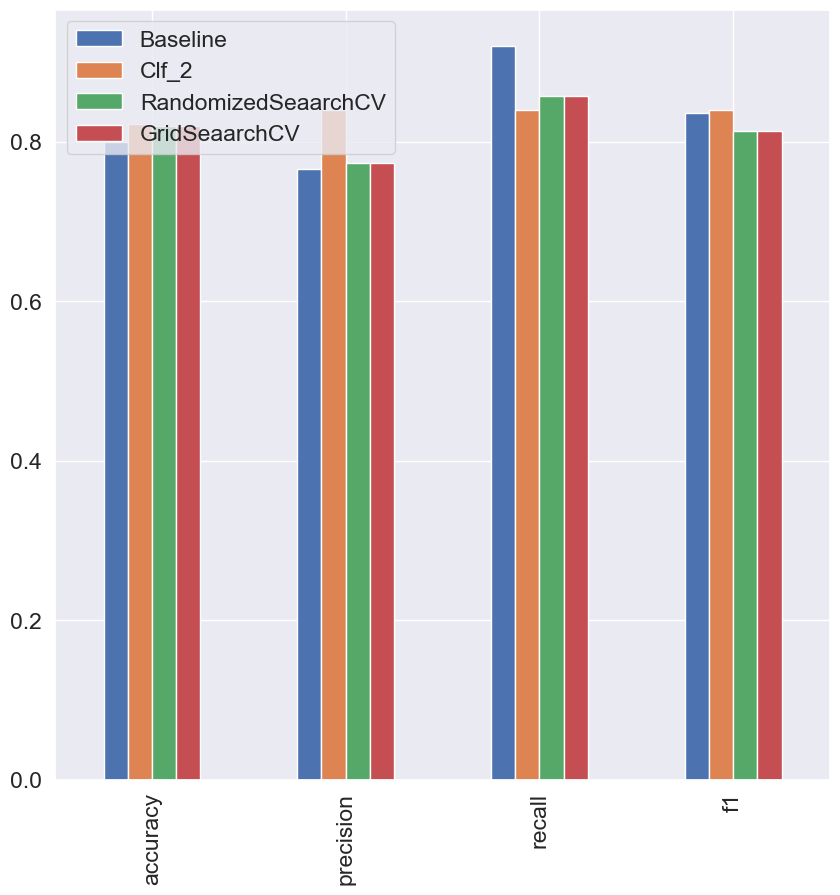

In [247]:
compare_metrics=pd.DataFrame({"Baseline":baseline_metrics,
                             "Clf_2":clf_2_metrics,
                             "RandomizedSeaarchCV":rs_metrics,
                             "GridSeaarchCV":gs_metrics})
compare_metrics.plot.bar(figsize=(10,10))

**Pickle**

In [249]:
import pickle
pickle.dump(gs_clf,open("gs_random_forest_classifier.pkl","wb"))

C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\738695718.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_classifier.pkl'>
  pickle.dump(gs_clf,open("gs_random_forest_classifier.pkl","wb"))


In [252]:
loaded_pickle_model=pickle.load(open("gs_random_forest_classifier.pkl","rb"))

C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\3381111512.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_classifier.pkl'>
  loaded_pickle_model=pickle.load(open("gs_random_forest_classifier.pkl","rb"))


In [253]:
pickle_y_preds=loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy : 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.819672131147541,
 'precision': 0.7741935483870968,
 'recall': 0.8571428571428571,
 'f1': 0.8135593220338982}

**Joblib**

In [255]:
from joblib import dump,load
dump(gs_clf,filename="gs_random_forest_classifier.pkl")


['gs_random_forest_classifier.pkl']

In [256]:
loaded_job_model=load(filename="gs_random_forest_classifier.pkl")

In [257]:
job_y_preds=loaded_job_model.predict(x_test)
evaluate_preds(y_test,job_y_preds)

Accuracy : 81.97%
Precision : 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.819672131147541,
 'precision': 0.7741935483870968,
 'recall': 0.8571428571428571,
 'f1': 0.8135593220338982}

# Putting all together

In [259]:
car_sales=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")
car_sales

<>:1: DeprecationWarning: invalid escape sequence \g
<>:1: DeprecationWarning: invalid escape sequence \g
C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\3731434165.py:1: DeprecationWarning: invalid escape sequence \g
  car_sales=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [260]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [265]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do all in one:
1. Fill Missing Data
2. Convert Data to Numbers
3. Cuild a model on the data

In [283]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# import data and drop rows with missing labels
data=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and transformer pipeline
categorical_feature=["Make","Colour"]
categorical_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                        ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_feature=["Doors"]
door_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_feature=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

# setup preprocessing steps (fill missing values, then convert to numbers) 
preprocessor=ColumnTransformer(transformers=[("cat",categorical_transformer,categorical_feature),
                                             ("door",door_transformer,door_feature),
                                             ("num",numeric_transformer,numeric_feature)])

# Creating a preprocessing aand modelling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
                     ("model",RandomForestRegressor())])

# Spit Data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

<>:17: DeprecationWarning: invalid escape sequence \g
<>:17: DeprecationWarning: invalid escape sequence \g
C:\Users\rugyr\AppData\Local\Temp\ipykernel_15260\4187836155.py:17: DeprecationWarning: invalid escape sequence \g
  data=pd.read_csv("E:\gyanesh\python\Machine learning\zero-to-mastery-ml-master\data\car-sales-extended-missing-data.csv")


0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [298]:
pipe_grid={"preprocessor__num__imputer__strategy":["mean","median"],
           "model__n_estimators":[100,1000],
           "model__max_depth":[None,5],
           "model__max_features":['auto','sqrt'],
           "model__min_samples_split":[2,4]}
gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train);

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   4.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   4.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__n

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=media

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strate

C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\rugyr\anaconda3\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\

In [299]:
gs_model.score(x_test,y_test)

0.2970584538514702